In [36]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt

In [27]:
# Inicializar el modelo secuencial
model = Sequential()

# Añadir una capa de convolución
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))  # (64, 64, 3) es el tamaño de la imagen y 3 canales de color (RGB)
model.add(MaxPooling2D((2, 2)))  # Capa de max-pooling

# Añadir una segunda capa de convolución
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Añadir una tercera capa de convolución
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Aplanar las dimensiones para pasar a las capas densas (fully connected)
model.add(Flatten())

# Añadir una capa densa completamente conectada
model.add(Dense(128, activation='relu'))

# Añadir una capa de salida para clasificación
model.add(Dense(1, activation='sigmoid'))

In [28]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Si tienes una clasificación binaria usa 'binary_crossentropy'
              metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 683,329 (2.61 MB)

 Trainable params: 683,329 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
train_dir = './train'
test_dir = './test'

In [31]:
# X_train y y_train son tus datos de entrenamiento (imágenes y etiquetas)
# X_val y y_val son tus datos de validación

# Parámetros para preprocesamiento y aumento de datos
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Escala los valores de los píxeles a [0, 1]
    shear_range=0.2,    # Rango de corte aleatorio
    zoom_range=0.2,     # Rango de zoom aleatorio
    horizontal_flip=True # Volteo horizontal aleatorio
)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Cargar imágenes de entrenamiento con data augmentation
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),  # Tamaño al que se redimensionarán las imágenes
    batch_size=32,         # Tamaño del batch
    class_mode='binary'    # Como tienes dos clases: "Benign" y "Malignant", se usa "binary"
)

# Cargar imágenes de validación sin data augmentation
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),  # Tamaño al que se redimensionarán las imágenes
    batch_size=32,
    class_mode='binary'
)

Found 11879 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [32]:
# Ajustar el modelo
history = model.fit(
    train_generator,                    # Generador de datos de entrenamiento
    steps_per_epoch=len(train_generator), # Número de batches por época (opcionalmente podrías definirlo manualmente)
    epochs=10,                          # Número de épocas de entrenamiento
    validation_data=test_generator,     # Generador de datos de validación
    validation_steps=len(test_generator) # Número de batches de validación por época
)


Epoch 1/10


c:\Users\mglez\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\losses\losses.py:27: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


372/372 ━━━━━━━━━━━━━━━━━━━━ 283s 750ms/step - accuracy: 0.5239 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.0000e+00
Epoch 2/10
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/10


c:\Users\mglez\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


372/372 ━━━━━━━━━━━━━━━━━━━━ 85s 229ms/step - accuracy: 0.5278 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.0000e+00
Epoch 4/10
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 75us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/10
372/372 ━━━━━━━━━━━━━━━━━━━━ 57s 152ms/step - accuracy: 0.5318 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.0000e+00
Epoch 6/10
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 67us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10
372/372 ━━━━━━━━━━━━━━━━━━━━ 58s 156ms/step - accuracy: 0.5313 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.0000e+00
Epoch 8/10
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/10
372/372 ━━━━━━━━━━━━━━━━━━━━ 77s 206ms/step - accuracy: 0.5251 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.0000e+00
Epoch 10/10
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 71us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00


In [33]:
# Guardar el modelo completo
model.save('models/primer_cnn.h5')

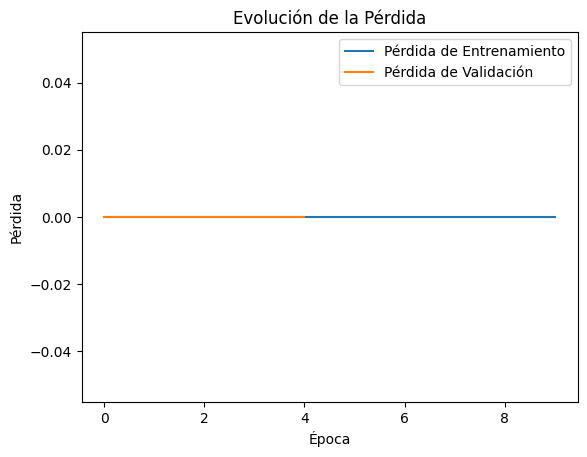

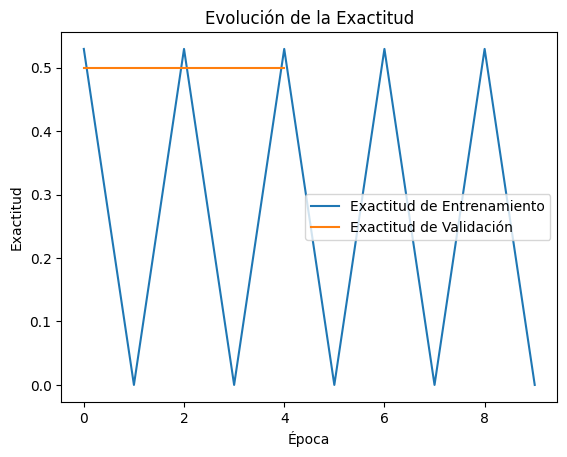

In [38]:
# Graficar la pérdida
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.title('Evolución de la Pérdida')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# Graficar la exactitud
plt.plot(history.history['accuracy'], label='Exactitud de Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Exactitud de Validación')
plt.title('Evolución de la Exactitud')
plt.xlabel('Época')
plt.ylabel('Exactitud')
plt.legend()
plt.show()

Esto no es exactamente lo que buscamos, ya que la gráfica que estamos buscando se parece mas a esta

![Grafica Correcta](img/bien_entrenado.png)

Crearemos un nuevo modelo con menos capas para ver que resultado obtenemos